<img src='ipydata/열처리.png' align='center' width="1500px"/>

<ul><li style="font-size:2em;">제조 데이터 준비</li></ul>
<img src="ipydata/온도.png" style="display:block; margin:0 auto; width:600px">
<br>
<span style="font-size:20px;">사용대상: 열처리 뿌리업종 내 가열로 내에서 발생하는 온도 제조데이터(Thermo Sensor활용)</span>

<ul><li style="font-size:2em;">제조물</li></ul>

<div style="width:1200px; margin:0 auto;">
<a href="#"><img style="width:300px; height:200px" src="ipydata/부품1.png"></a>
<a href="#"><img style="width:300px; height:200px" src="ipydata/부품3.png"></a>
<a href="#"><img style="width:300px; height:200px" src="ipydata/부품2.png"></a>
</div>
<br>
<span style="font-size:20px;">선박 및 차량 부속용 금속 부품 Tempering</span>

<ul><li style="font-size:2em;">현장문제</li></ul>
<div style="width:1200px; margin:0 auto;">
<a href="#"><img style="width:400px; height:200px" src="ipydata/가열1.png"></a>
<a href="#"><img style="width:350px; height:200px" src="ipydata/가열2.png"></a>
</div>
<br>
<span style="font-size:20px;"><br>공정 시 가열로는 폐쇄된 상태로 작동하기 때문에 내부 상태를 확인할 수 없어 품질 상태를 예측할 수 없고 공정이 끝난 뒤에야 공정에 대한 불량을 감지할 수 있음</span>

<ul><li style="font-size:2em;">제조AI 개발 목적</li></ul>
<img src="ipydata/예측.png" style="display:block; margin:0 auto;"><br>
<br>
<span style="font-size:20px;">가열로 내 온도 제조데이터를 활용하여 가열로 내부의 상태를 파악하고,<br>이를 통해 산출물의 품질 상태를 예측하고, 불량 발생 예측 시 공정 조건 변경을 진행하여 불량률을 줄이기 위함</span>

### 코드에 필요한 모듈 설치

In [1]:
# !pip install tensorflow --user
# !pip install keras --user
# !pip install pandas --user
# !pip install numpy --user
# !pip install sklearn --user
# !pip install seaborn --user
# !pip install datetime --user
# !pip install matplotlib --user
# !pip install pydot --user
# !pip install graphviz --user
# !pip install protobuf==3.20.1

# Library Import

### 엑셀 제조데이터 및 AI 모델을 사용하기 위해 다음 모듈 사용

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from datetime import datetime
import datetime
from sklearn import tree
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
import tensorflow

2023-04-17 06:53:44.408373: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-17 06:53:44.411210: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-17 06:53:44.471355: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-17 06:53:44.473135: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-17 06:53:45.363490: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

### 모델의 평가를 위해 다음 모듈 사용

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

# Data List

제조 데이터 폴더 내 csv 파일 리스트를 생성해, process rate 제조 데이터 파일을 error_list에 저장하고, pH와 Temp 제조 데이터 파일을 data_list에 저장했다. 

### 제조데이터를 가져오기 위해 제조데이터 폴더 내 파일 리스트 생성

In [3]:
# 파일 리스트 호출
root_dir = os.path.join(os.getcwd(), 'data')
f_lists = os.listdir(root_dir)
print("File Lists : ", f_lists)

File Lists :  ['kemp-abh-sensor-2021.10.22.csv', 'kemp-abh-sensor-2021.10.08.csv', 'kemp-abh-sensor-2021.09.27.csv', 'kemp-abh-sensor-2021.09.28.csv', 'kemp-abh-sensor-2021.09.08.csv', 'kemp-abh-sensor-2021.10.15.csv', 'kemp-abh-sensor-2021.09.07.csv', 'kemp-abh-sensor-2021.10.12.csv', 'kemp-abh-sensor-2021.10.14.csv', 'kemp-abh-sensor-2021.10.26.csv', 'kemp-abh-sensor-2021.10.21.csv', 'kemp-abh-sensor-2021.09.06.csv', 'kemp-abh-sensor-2021.09.10.csv', 'kemp-abh-sensor-2021.09.17.csv', 'kemp-abh-sensor-2021.09.29.csv', 'kemp-abh-sensor-2021.10.13.csv', 'kemp-abh-sensor-2021.09.13.csv', 'kemp-process-rate.csv', 'kemp-abh-sensor-2021.09.16.csv', 'kemp-abh-sensor-2021.09.15.csv', 'kemp-abh-sensor-2021.09.30.csv', 'kemp-abh-sensor-2021.10.05.csv', 'kemp-abh-sensor-2021.09.23.csv', 'kemp-abh-sensor-2021.09.09.csv', 'kemp-abh-sensor-2021.10.06.csv', 'kemp-abh-sensor-2021.10.07.csv', 'kemp-abh-sensor-2021.10.20.csv', 'kemp-abh-sensor-2021.10.19.csv', 'kemp-abh-sensor-2021.10.27.csv', 'kemp-ab

### 파일 리스트 중, csv로 된 파일만 가져와 제조데이터 파일 리스트 생성

In [4]:
# csv 파일만 저장
new_file_lists = [f for f in f_lists if f.endswith('.csv')]
new_file_lists = sorted(new_file_lists)
print("File Lists : ", new_file_lists)

File Lists :  ['kemp-abh-sensor-2021.09.06.csv', 'kemp-abh-sensor-2021.09.07.csv', 'kemp-abh-sensor-2021.09.08.csv', 'kemp-abh-sensor-2021.09.09.csv', 'kemp-abh-sensor-2021.09.10.csv', 'kemp-abh-sensor-2021.09.13.csv', 'kemp-abh-sensor-2021.09.14.csv', 'kemp-abh-sensor-2021.09.15.csv', 'kemp-abh-sensor-2021.09.16.csv', 'kemp-abh-sensor-2021.09.17.csv', 'kemp-abh-sensor-2021.09.23.csv', 'kemp-abh-sensor-2021.09.24.csv', 'kemp-abh-sensor-2021.09.27.csv', 'kemp-abh-sensor-2021.09.28.csv', 'kemp-abh-sensor-2021.09.29.csv', 'kemp-abh-sensor-2021.09.30.csv', 'kemp-abh-sensor-2021.10.01.csv', 'kemp-abh-sensor-2021.10.05.csv', 'kemp-abh-sensor-2021.10.06.csv', 'kemp-abh-sensor-2021.10.07.csv', 'kemp-abh-sensor-2021.10.08.csv', 'kemp-abh-sensor-2021.10.12.csv', 'kemp-abh-sensor-2021.10.13.csv', 'kemp-abh-sensor-2021.10.14.csv', 'kemp-abh-sensor-2021.10.15.csv', 'kemp-abh-sensor-2021.10.18.csv', 'kemp-abh-sensor-2021.10.19.csv', 'kemp-abh-sensor-2021.10.20.csv', 'kemp-abh-sensor-2021.10.21.csv',

### 제조데이터 파일 리스트 중 공정 제조데이터와 결과 제조데이터를 분리

In [5]:
# process Rate 제조데이터 파일을 Error Data List에 저장하고, pH와 Temp 제조데이터 파일을 data lists에 저장
data_lists = new_file_lists[:-1]
error_list = new_file_lists[-1]
print("Data Lists : ", data_lists)
print("Error Data List : ", error_list)

Data Lists :  ['kemp-abh-sensor-2021.09.06.csv', 'kemp-abh-sensor-2021.09.07.csv', 'kemp-abh-sensor-2021.09.08.csv', 'kemp-abh-sensor-2021.09.09.csv', 'kemp-abh-sensor-2021.09.10.csv', 'kemp-abh-sensor-2021.09.13.csv', 'kemp-abh-sensor-2021.09.14.csv', 'kemp-abh-sensor-2021.09.15.csv', 'kemp-abh-sensor-2021.09.16.csv', 'kemp-abh-sensor-2021.09.17.csv', 'kemp-abh-sensor-2021.09.23.csv', 'kemp-abh-sensor-2021.09.24.csv', 'kemp-abh-sensor-2021.09.27.csv', 'kemp-abh-sensor-2021.09.28.csv', 'kemp-abh-sensor-2021.09.29.csv', 'kemp-abh-sensor-2021.09.30.csv', 'kemp-abh-sensor-2021.10.01.csv', 'kemp-abh-sensor-2021.10.05.csv', 'kemp-abh-sensor-2021.10.06.csv', 'kemp-abh-sensor-2021.10.07.csv', 'kemp-abh-sensor-2021.10.08.csv', 'kemp-abh-sensor-2021.10.12.csv', 'kemp-abh-sensor-2021.10.13.csv', 'kemp-abh-sensor-2021.10.14.csv', 'kemp-abh-sensor-2021.10.15.csv', 'kemp-abh-sensor-2021.10.18.csv', 'kemp-abh-sensor-2021.10.19.csv', 'kemp-abh-sensor-2021.10.20.csv', 'kemp-abh-sensor-2021.10.21.csv',

# Make Function

리스트에 있는 csv 파일을 읽는다. \
파일 내에 날짜 및 시간 정보를 'Time'으로 날짜 정보를 'DTime' 컬럼으로 나머지 정보를 해당 컬럼으로 구성된 데이터 프레임을 생성한다. 

### 제조데이터를 하나의 프레임으로 만드는 함수 정의

In [6]:
# 파일을 불러와 파일 이름에서 날짜(연, 월, 일)을 추출하여, 날짜(연월일)와 시간은 Time 컬럼으로 날짜(연월일)는 DTime 컬럼으로 넣은 제조데이터 프레임 형성
def csv_read_(data_dir, data_list):
    tmp = pd.read_csv(os.path.join(data_dir, data_list), sep=',')
    y, m, d = map(int, data_list.split('-')[-1].split('.')[:-1]) # 파일 이름에서 연, 월, 일 추출
    time = tmp['Time']
    tmp['DTime'] = '-'.join(data_list.split('-')[-1].split('.')[:-1]) # 날짜(연, 월, 일만)를 Dtime 컬럼에 저장
    ctime = time.apply(lambda _ : _.replace(u'오후', 'PM').replace(u'오전', 'AM')) # 오전 -> AM으로 오후 -> PM으로 변환
    n_time = ctime.apply(lambda _ : datetime.datetime.strptime(_, "%p %I:%M:%S")) # 시, 분, 초 입력
    newtime = n_time.apply(lambda _ : _.replace(year=y, month=m, day=d)) # 시, 분, 초 앞에 날짜 입력
    tmp['Time'] = newtime # Time 컬럼에 '연-월-일 시:분:초' 제조데이터 저장
    return tmp

# Make Dedicated DataFrame

제조 데이터 파일 리스트의 모든 파일을 불러, 모든 파일 데이터를 하나의 데이터 프레임에 merge해 모든 제조 데이터를 하나의 데이터 프레임에 저장했다. \
Time을 index로 지정하고, null값을 제거하는 전처리를 실행했다. \
Lot 번호의 중복 없는 값과, Time 날짜의 중복 없는 값을 각 리스트에 저장했다.

### 위에서 만든 함수를 통해 하나의 공정 제조데이터 프레임으로 생성

In [7]:
# PH, Temp 제조데이터 파일을 모두 불러와 하나의 제조데이터 프레임으로 합병
dd = csv_read_(root_dir, data_lists[0])
for i in range(1, len(data_lists)):
    dd = pd.merge(dd, csv_read_(root_dir, data_lists[i]), how='outer')
dd

,Index,LoT,Time,pH,Temp,DTime
0,1,1,2021-09-06 09:01:18,1.02,47.18,2021-09-06
1,2,1,2021-09-06 09:01:23,1.05,47.34,2021-09-06
2,3,1,2021-09-06 09:01:28,1.09,48.45,2021-09-06
3,4,1,2021-09-06 09:01:33,1.12,48.46,2021-09-06
4,5,1,2021-09-06 09:01:38,1.15,48.47,2021-09-06
...,...,...,...,...,...,...
50089,1514,22,2021-10-27 11:14:41,2.79,51.83,2021-10-27
50090,1515,22,2021-10-27 11:14:46,3.62,42.20,2021-10-27
50091,1516,22,2021-10-27 11:14:51,3.40,41.88,2021-10-27
50092,1517,22,2021-10-27 11:14:56,3.59,40.62,2021-10-27


### 제조데이터 프레임내 Index 컬럼 제거

In [8]:
# 합병 과정 중 생긴 Index 컬럼 제거
dd = dd.drop('Index', axis=1)
dd

,LoT,Time,pH,Temp,DTime
0,1,2021-09-06 09:01:18,1.02,47.18,2021-09-06
1,1,2021-09-06 09:01:23,1.05,47.34,2021-09-06
2,1,2021-09-06 09:01:28,1.09,48.45,2021-09-06
3,1,2021-09-06 09:01:33,1.12,48.46,2021-09-06
4,1,2021-09-06 09:01:38,1.15,48.47,2021-09-06
...,...,...,...,...,...
50089,22,2021-10-27 11:14:41,2.79,51.83,2021-10-27
50090,22,2021-10-27 11:14:46,3.62,42.20,2021-10-27
50091,22,2021-10-27 11:14:51,3.40,41.88,2021-10-27
50092,22,2021-10-27 11:14:56,3.59,40.62,2021-10-27


### 제조데이터 프레임 Index를 Time으로 지정

In [9]:
# Time 컬럼을 인덱스로 지정
dd = dd.set_index('Time')
dd

,LoT,pH,Temp,DTime
Time,,,,
2021-09-06 09:01:18,1,1.02,47.18,2021-09-06
2021-09-06 09:01:23,1,1.05,47.34,2021-09-06
2021-09-06 09:01:28,1,1.09,48.45,2021-09-06
2021-09-06 09:01:33,1,1.12,48.46,2021-09-06
2021-09-06 09:01:38,1,1.15,48.47,2021-09-06
...,...,...,...,...
2021-10-27 11:14:41,22,2.79,51.83,2021-10-27
2021-10-27 11:14:46,22,3.62,42.20,2021-10-27
2021-10-27 11:14:51,22,3.40,41.88,2021-10-27


### 제조데이터 사본 생성

In [10]:
# dedicated_data라는 이름으로 제조데이터 사본 만듦
dedicated_data = dd.copy()
dedicated_data

,LoT,pH,Temp,DTime
Time,,,,
2021-09-06 09:01:18,1,1.02,47.18,2021-09-06
2021-09-06 09:01:23,1,1.05,47.34,2021-09-06
2021-09-06 09:01:28,1,1.09,48.45,2021-09-06
2021-09-06 09:01:33,1,1.12,48.46,2021-09-06
2021-09-06 09:01:38,1,1.15,48.47,2021-09-06
...,...,...,...,...
2021-10-27 11:14:41,22,2.79,51.83,2021-10-27
2021-10-27 11:14:46,22,3.62,42.20,2021-10-27
2021-10-27 11:14:51,22,3.40,41.88,2021-10-27


### 제조데이터 프레임 요약

In [11]:
# 제조데이터의 정보 확인 
dedicated_data.describe()

,LoT,pH,Temp
count,50094.000000,50094.000000,50094.000000
mean,11.500000,2.006488,49.876127
std,6.344352,0.551698,1.345322
min,1.000000,1.010000,38.020000
25%,6.000000,1.560000,49.280000
50%,11.500000,2.000000,49.970000
75%,17.000000,2.440000,50.630000
max,22.000000,3.990000,54.190000


### 제조데이터 프레임 컬럼 확인

In [12]:
# 제조데이터의 컬럼 이름 확인
dedicated_data.columns

Index(['LoT', 'pH', 'Temp', 'DTime'], dtype='object')

### 제조데이터 프레임 타입, 개수 확인

In [13]:
# 각 컬럼별 제조데이터 타입 확인
dedicated_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50094 entries, 2021-09-06 09:01:18 to 2021-10-27 11:15:01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LoT     50094 non-null  int64  
 1   pH      50094 non-null  float64
 2   Temp    50094 non-null  float64
 3   DTime   50094 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 1.9+ MB


### 제조데이터 프레임 형태 확인

In [14]:
# 행 50094, 열 4개의 구성임을 확인
dedicated_data.shape

(50094, 4)

### 제조데이터 프레임 내 결측치 개수 확인

In [15]:
# 제조데이터 프레임에 0값이 없음을 확인
dedicated_data.isna().sum()

LoT      0
pH       0
Temp     0
DTime    0
dtype: int64

### 제조데이터 컬럼 별 히스토그램 확인

array([[<Axes: title={'center': 'LoT'}>, <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'Temp'}>, <Axes: >]], dtype=object)

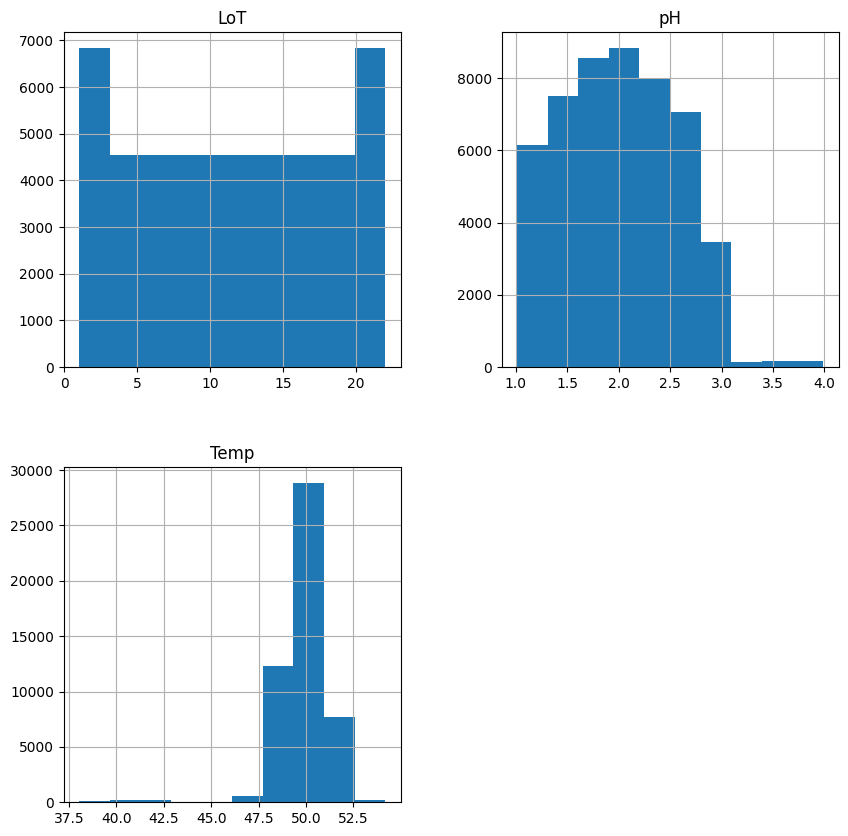

In [16]:
# 히스토그램으로 컬럼별 제조데이터 시각화
dedicated_data.hist(figsize=(10,10))

### 제조데이터 프레임 내 결측치 행 제거

In [17]:
# 제조데이터에서 공백 제거
dedicated_data = dedicated_data.dropna()
dedicated_data

,LoT,pH,Temp,DTime
Time,,,,
2021-09-06 09:01:18,1,1.02,47.18,2021-09-06
2021-09-06 09:01:23,1,1.05,47.34,2021-09-06
2021-09-06 09:01:28,1,1.09,48.45,2021-09-06
2021-09-06 09:01:33,1,1.12,48.46,2021-09-06
2021-09-06 09:01:38,1,1.15,48.47,2021-09-06
...,...,...,...,...
2021-10-27 11:14:41,22,2.79,51.83,2021-10-27
2021-10-27 11:14:46,22,3.62,42.20,2021-10-27
2021-10-27 11:14:51,22,3.40,41.88,2021-10-27


### 중복이 없는 Lot 번호 리스트 추출

In [18]:
# 제조데이터 프레임 내 LoT 번호 추출
lot_lists = dedicated_data['LoT'].unique()
print(lot_lists)
print(len(lot_lists))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
22


### 중복이 없는 날짜 리스트 추출

In [19]:
# 제조데이터 프레임 내 날짜(연, 월, 일만) 추출
d_lists = dedicated_data['DTime'].unique()
print(d_lists)
print(len(d_lists))

['2021-09-06' '2021-09-07' '2021-09-08' '2021-09-09' '2021-09-10'
 '2021-09-13' '2021-09-14' '2021-09-15' '2021-09-16' '2021-09-17'
 '2021-09-23' '2021-09-24' '2021-09-27' '2021-09-28' '2021-09-29'
 '2021-09-30' '2021-10-01' '2021-10-05' '2021-10-06' '2021-10-07'
 '2021-10-08' '2021-10-12' '2021-10-13' '2021-10-14' '2021-10-15'
 '2021-10-18' '2021-10-19' '2021-10-20' '2021-10-21' '2021-10-22'
 '2021-10-25' '2021-10-26' '2021-10-27']
33


# Read Process Data

process-rate 파일을 불러와, 하나의 데이터 프레임으로 생성하고, 중복 없는 Lot 번호와 날짜 리스트를 추출해 저장했다.

### 결과 제조데이터 프레임 생성

In [20]:
# Process Rate 제조데이터 파일 kemp-process-rate.csv 불러오기
process = pd.read_csv(os.path.join(root_dir, error_list), sep=',')
process

,Date,LoT,Process Rate
0,2021-09-06,1,96.38
1,2021-09-06,2,97.40
2,2021-09-06,3,95.40
3,2021-09-06,4,96.35
4,2021-09-06,5,94.77
...,...,...,...
721,2021-10-27,18,97.29
722,2021-10-27,19,97.21
723,2021-10-27,20,98.38
724,2021-10-27,21,98.36


### 결과 제조프레임을 통해 중복이 없는 LoT 번호, 날짜 리스트 추출

In [21]:
lot_process_lists = process['LoT'].unique() # LoT 번호 추출
d_process_lists = process['Date'].unique() # 날짜 추출
print("Unique LoT List : ", lot_process_lists)
print("Unique Date List : ", d_process_lists)

Unique LoT List :  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
Unique Date List :  ['2021-09-06' '2021-09-07' '2021-09-08' '2021-09-09' '2021-09-10'
 '2021-09-13' '2021-09-14' '2021-09-15' '2021-09-16' '2021-09-17'
 '2021-09-23' '2021-09-24' '2021-09-27' '2021-09-28' '2021-09-29'
 '2021-09-30' '2021-10-01' '2021-10-05' '2021-10-06' '2021-10-07'
 '2021-10-08' '2021-10-12' '2021-10-13' '2021-10-14' '2021-10-15'
 '2021-10-18' '2021-10-19' '2021-10-20' '2021-10-21' '2021-10-22'
 '2021-10-25' '2021-10-26' '2021-10-27']


# Make Training Data Set

제조 데이터와 에러 제조 데이터를 이용해 train/test data를 생성했다. \
날짜와 Lot번호를 이용해, pH, Temp, Voltage, QC 데이터를 하나의 데이터 프레임으로 만들어 통합 제조 데이터를 구성했다. \
해당 통합 데이터를 8:2의 비율로 train data set과 test data set으로 나누었다.

### 통합 제조데이터 생성을 위한 프레임 생성

In [22]:
# X_data라는 이름으로 pH, Temp, LoT, Process라는 컬럼을 가진 빈 제조데이터 프레임 형성
X_data = pd.DataFrame(columns=['pH','Temp', 'LoT', 'Process'])

### 통합 제조데이터를 공정 제조데이터와 결과 제조데이터를 통해 생성

In [26]:
# 날짜와 LoT 번호를 대조하여 pH, Temp 제조데이터와 Process Rate 제조데이터를 하나의 테이블로 합병
for d in d_lists:
    for lot in lot_lists:
        tmp = dedicated_data[(dedicated_data['DTime']==d)&(dedicated_data['LoT']==lot)]
        tmp = tmp[['pH', 'Temp', 'LoT']]
        process_val = process[(process['Date']==d)&((process['LoT']==lot))]['Process Rate'].values
        trr = np.full((tmp['pH'].shape), process_val)
        tmp['Process'] = trr
        X_data = pd.concat([X_data, tmp])
X_data=X_data.apply(pd.to_numeric)
X_data = X_data[['LoT', 'pH', 'Temp', 'Process']]

### 생성된 통합 제조데이터 확인

In [27]:
X_data # 데이터 확인

,LoT,pH,Temp,Process
2021-09-06 09:01:18,1,1.02,47.18,96.38
2021-09-06 09:01:23,1,1.05,47.34,96.38
2021-09-06 09:01:28,1,1.09,48.45,96.38
2021-09-06 09:01:33,1,1.12,48.46,96.38
2021-09-06 09:01:38,1,1.15,48.47,96.38
...,...,...,...,...
2021-10-27 11:14:41,22,2.79,51.83,96.03
2021-10-27 11:14:46,22,3.62,42.20,96.03
2021-10-27 11:14:51,22,3.40,41.88,96.03
2021-10-27 11:14:56,22,3.59,40.62,96.03


### 통합 제조데이터 프레임 요약

In [28]:
# 데이터 프레임 정보 확인
X_data.describe()

,LoT,pH,Temp,Process
count,50094.000000,50094.000000,50094.000000,50094.000000
mean,11.500000,2.006488,49.876127,96.064229
std,6.344352,0.551698,1.345322,3.210621
min,1.000000,1.010000,38.020000,80.780000
25%,6.000000,1.560000,49.280000,96.170000
50%,11.500000,2.000000,49.970000,96.635000
75%,17.000000,2.440000,50.630000,97.260000
max,22.000000,3.990000,54.190000,98.450000


### 통합 제조데이터를 학습용 제조데이터와 테스트용 제조데이터로 분리

In [29]:
# 학습을 위해 데이터를 8:2 비율로 train_data와 test_data로 나눔
train_data, test_data = train_test_split(X_data, test_size=0.2)

### 학습용 제조데이터 프레임 요약

In [30]:
# 학습용 데이터인 train_data의 정보 확인
train_data.describe()

,LoT,pH,Temp,Process
count,40075.000000,40075.000000,40075.000000,40075.000000
mean,11.501061,2.008506,49.879955,96.065518
std,6.338934,0.551256,1.341723,3.207939
min,1.000000,1.010000,38.020000,80.780000
25%,6.000000,1.560000,49.280000,96.170000
50%,11.000000,2.000000,49.970000,96.640000
75%,17.000000,2.440000,50.640000,97.260000
max,22.000000,3.990000,54.190000,98.450000


### 테스트용 제조데이터 프레임 요약

In [31]:
# 검증용 데이터인 test_data의 정보 확인
test_data.describe()

,LoT,pH,Temp,Process
count,10019.000000,10019.000000,10019.000000,10019.000000
mean,11.495758,1.998418,49.860814,96.059070
std,6.366294,0.553415,1.359580,3.221482
min,1.000000,1.010000,38.200000,80.780000
25%,6.000000,1.550000,49.260000,96.180000
50%,12.000000,1.990000,49.950000,96.630000
75%,17.000000,2.430000,50.630000,97.270000
max,22.000000,3.990000,53.590000,98.450000


### 시각화 모듈 사용

In [32]:
import seaborn as sns

# 모델링

# Decision Tree Regressor Model

Decision Tree를 사용한 모델을 구성해 train data를 학습시켰다. \
Input을 pH, Temp로 Output을 Process로 구성해서, pH, Temp 값이 입력되면 Process 값을 예측하는 Decision Tree 회귀 모델을 구성했다. \
구성된 Tree는 시각화하여, tree의 구조를 눈으로 확인할 수 있다.

### 학습 모델 생성

In [33]:
# 튜닝하지 않은 Decision Tree 회귀 모델 구성
clf = tree.DecisionTreeRegressor()

### 모델 학습

In [34]:
# 모델 학습 후 clf로 모델 저장
clf = clf.fit(train_data[['pH','Temp']], train_data[['Process']])

vis : Model 시각화 진행 유무에 대한 trigger 역할

* 모델을 시각화하여 보고 싶으면 vis = True로 진행
* 모델을 시각화하고 싶지 않으면 vis = False로 진행

기본적인 Decision Tree Regressor Model의 경우 Tree Depth가 정해져있지 않기 때문에 깊은 모델이 만들어지며, 이에 따라 시각화하는데 시간이 오래 걸릴 수 있음.

### 시각화 진행 유무 변수 선언

In [35]:
vis = False

### 시각화 진행 유무 변수에 따라 시각화 진행

In [36]:
# 모델 시각화
if vis:
    plt.figure(figsize=(10, 30))
    tree.plot_tree(clf)
    plt.show()

# Decision Tree Regressor Model Tuning

Decision Tree의 뻗어 나가는 깊이를 3으로 제한하는 모델을 구성해 train data를 학습시켰다. \
이렇게 튜닝한 모델을 학습해 시각화했다.

### 튜닝한 모델 생성

In [37]:
# 트리의 최대 깊이를 3으로 제한하여 모델 형성(3번까지만 트리를 뻗을 수 있도록 제한함)
new_clf = tree.DecisionTreeRegressor(max_depth=3)

### 튜닝한 모델 학습

In [38]:
# 모델 학습 후 new_clf로 모델 저장
new_clf = new_clf.fit(train_data[['pH','Temp']], train_data[['Process']])

### 튜닝한 모델 시각화

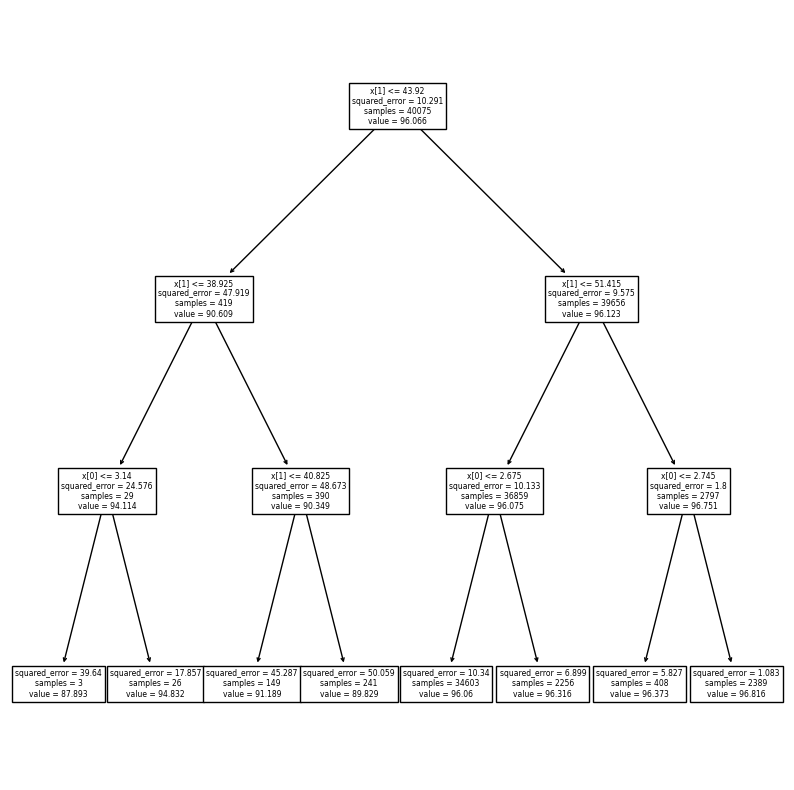

In [39]:
# 학습된 모델 시각화
plt.figure(figsize=(10, 10))
tree.plot_tree(new_clf)
plt.show()

# Test Model

튜닝하지 않은 모델과 트리의 깊이를 지정해 튜닝한 모델의 성능을 비교했다. \
성능 비교를 위해 RMSE, Accuracy 값을 산출했다. \
classification_report를 이용해 모델의 성능을 확인했다. \
pH, Temp 데이터와 예측 값을 각 모델별로 3D plot으로 시각화했다.

- rmse : 예측값과 실제값의 차이의 제곱 평균에 루트를 씌운 것. 낮을수록 좋은 성능을 지녔다고 할 수 있음
- accuracy(정확도) : 전체 샘플 중 맞게 예측한 샘플 수의 비율. 높을수록 좋은 성능을 지녔다고 할 수 있음

### 튜닝하지 않은 모델 성능 평가(RMSE)

In [40]:
# 튜닝하지 않은 Decision Tree 모델로 test data 예측 실시 및 rmse 검증
predicted_data = clf.predict(test_data[['pH', 'Temp']])
print('Decision Tree Model Predict : ', predicted_data)
rmse = sqrt(mean_squared_error(test_data['Process'], predicted_data))
print('Decision Tree Model RMSE : ',rmse)

Decision Tree Model Predict :  [97.305  94.52   97.925  ... 98.36   96.4675 97.215 ]
Decision Tree Model RMSE :  3.912141180333758


### 튜닝하지 않은 모델 성능 평가(Accuracy)

In [41]:
# Accuracy(정확도) 검증
y_test = test_data['Process']
y_test = [round(y, 0) for y in y_test]
y_pred = [round(y, 0) for y in predicted_data]
print("accuracy  = ", accuracy_score(y_test, y_pred))

accuracy  =  0.3330671723724923


### 튜닝하지 않은 모델 성능 평가(Report)

In [42]:
# 모델 성능 평가
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        81.0       0.00      0.00      0.00        57
        82.0       0.11      0.03      0.05       126
        83.0       0.12      0.03      0.05       210
        84.0       0.00      0.00      0.00       134
        86.0       0.00      0.00      0.00         0
        87.0       0.00      0.00      0.00         0
        88.0       0.00      0.00      0.00         0
        89.0       0.00      0.00      0.00         0
        90.0       0.00      0.00      0.00         0
        91.0       0.00      0.00      0.00         0
        92.0       0.00      0.00      0.00         0
        93.0       0.00      0.00      0.00         0
        94.0       0.00      0.00      0.00         0
        95.0       0.00      0.00      0.00        37
        96.0       0.38      0.27      0.31      3647
        97.0       0.41      0.53      0.47      4093
        98.0       0.20      0.10      0.14      1715

    accuracy              

/home/ted/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ted/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ted/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 튜닝하지 않은 모델 결과 3D 시각화

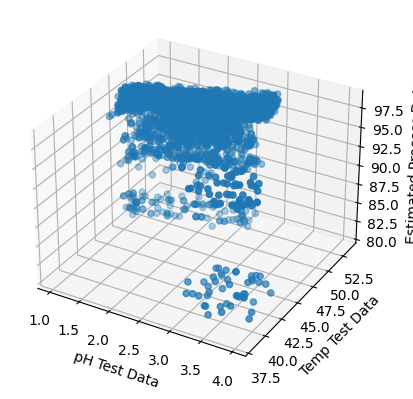

In [43]:
# test data로 예측한 결과를 3D로 시각화
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(test_data['pH'], test_data['Temp'], predicted_data)
ax.set_xlabel('pH Test Data')
ax.set_ylabel('Temp Test Data')
ax.set_zlabel('Estimated Process Data')
plt.show()

### 튜닝한 모델 성능 평가(RMSE)

In [44]:
# max_depth를 3으로 제한한 모델 예측 실시 및 rmse 검증
predicted_data = new_clf.predict(test_data[['pH', 'Temp']])
print('Decision Tree Model Predict : ', predicted_data)
rmse = sqrt(mean_squared_error(test_data['Process'], predicted_data))
print('Decision Tree Model RMSE : ',rmse)

Decision Tree Model Predict :  [96.05982169 96.05982169 96.31586436 ... 96.05982169 96.05982169
 96.05982169]
Decision Tree Model RMSE :  3.1835567341126247


### 튜닝한 모델 성능 평가(Accuracy)

In [45]:
# Accuracy(정확도) 검증
y_test = test_data['Process']
y_test = [round(y, 0) for y in y_test]
y_pred = [round(y, 0) for y in predicted_data]
print("accuracy  = ", accuracy_score(y_test, y_pred))

accuracy  =  0.3649066773131051


### 튜닝한 모델 성능 평가(Report)

In [46]:
# 모델 성능 평가
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        81.0       0.00      0.00      0.00        57
        82.0       0.00      0.00      0.00       126
        83.0       0.00      0.00      0.00       210
        84.0       0.00      0.00      0.00       134
        90.0       0.00      0.00      0.00         0
        91.0       0.00      0.00      0.00         0
        95.0       0.00      0.00      0.00        37
        96.0       0.36      0.93      0.52      3647
        97.0       0.45      0.06      0.11      4093
        98.0       0.00      0.00      0.00      1715

    accuracy                           0.36     10019
   macro avg       0.08      0.10      0.06     10019
weighted avg       0.32      0.36      0.24     10019



/home/ted/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ted/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ted/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ted/.local/lib/python3.10/site-packages/sklearn/

### 튜닝한 모델 결과 3D 시각화

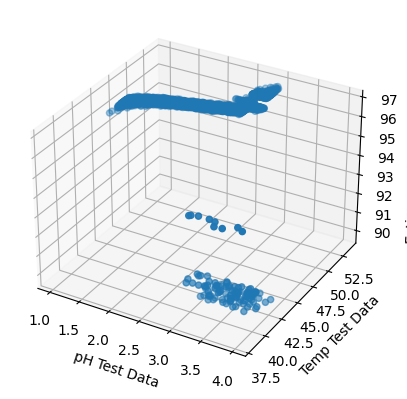

In [47]:
# test data로 예측한 결과를 3D로 시각화
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(test_data['pH'], test_data['Temp'], predicted_data)
ax.set_xlabel('pH Test Data')
ax.set_ylabel('Temp Test Data')
ax.set_zlabel('Estimated Process Data')
plt.show()